# Aula 2 - Matplotlib

### Documentações

[Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html)

### Importando os Dados

In [1]:
# instalando a biblioteca
# !pip install matplotlib==3.5

In [2]:
# importando a biblioteca
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Atividade

Instruções
- Resolver as questões abaixo. Subir o notebook em um repositório público no GitHub e enviar no [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform)
- Para resolver as questões abaixo utilizar o dataset do seaborn: 'mpg'
- Para os gráficos finais de cada questão, eles devem possuir título, rótulo dos eixos definidos e legenda (quando necessário).

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# importa dataset
dfCarros = sns.load_dataset('mpg')

In [5]:
dfCarros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### Questão 1

Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [6]:
dfCarros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
dfCarros = dfCarros.dropna().reset_index()

#### Questão 2

Qual a quantidade de carros por origem (*origin*)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

In [8]:
dfCarros.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
dfCarros['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

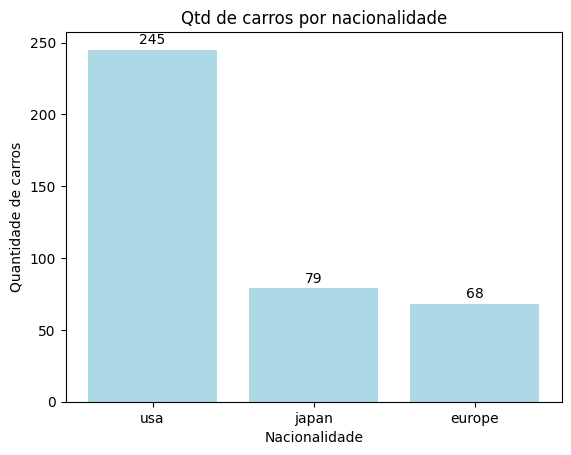

In [11]:
fig, ax = plt.subplots()
x_bar_carros = dfCarros['origin'].value_counts().index
y_bar_carros = dfCarros['origin'].value_counts().values

bars = ax.bar(x_bar_carros, y_bar_carros, color='lightblue')
ax.bar_label(bars, padding=2)

plt.xlabel('Nacionalidade')
plt.ylabel('Quantidade de carros')
plt.title('Qtd de carros por nacionalidade')
plt.show()

#### Questão 3

Qual a média da potência (*horsepower*) dos carros por origem?

In [12]:
dfCarros.groupby('origin')['horsepower'].mean()

origin
europe     80.558824
japan      79.835443
usa       119.048980
Name: horsepower, dtype: float64

In [13]:
dfCarros.groupby('origin')['horsepower'].mean().reset_index()


,origin,horsepower
0,europe,80.558824
1,japan,79.835443
2,usa,119.048980


#### Questão 4

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros?

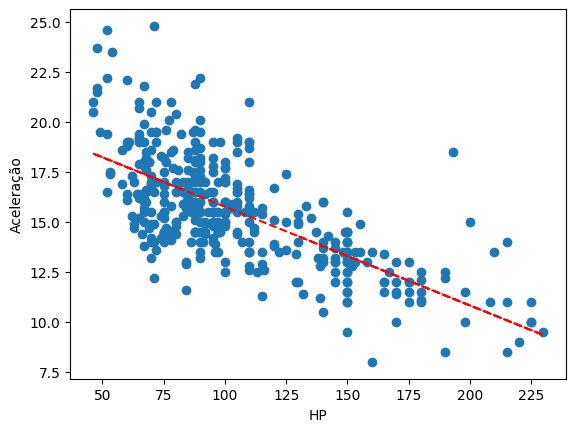

In [16]:
fig, ax = plt.subplots()

x_hp = dfCarros['horsepower']
y_acc = dfCarros['acceleration']
tend_line = np.polyfit(x_hp, y_acc, 1)
p = np.poly1d(tend_line)
plt.plot(x_hp, p(x_hp), 'r--') #linha de tendencia negativa, quanto maior a potência menor a aceleração
plt.xlabel('HP')
plt.ylabel('Aceleração')
plt.scatter(x_hp, y_acc, )
plt.show()

In [23]:
#Testando se essa correlação é significativa ou ocasional
#pip install scipy
import scipy
cor = scipy.stats.pearsonr (x_hp, y_acc) #quanto mais próximo aos extremos (+1 ou -1) mais forte e significativa é a correlação quando p>0.05
print(cor)

PearsonRResult(statistic=-0.6891955103342366, pvalue=1.5818862297815785e-56)


#### Questão 5

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros, segmentando de acordo com a origem (*origin*) com cores diferentes e plotando no mesmo eixo (*axes*)?

In [24]:
hp_europe = dfCarros[dfCarros['origin']=='europe']['horsepower']
hp_japan = dfCarros[dfCarros['origin']=='japan']['horsepower']
hp_usa = dfCarros[dfCarros['origin']=='usa']['horsepower']
acc_europe = dfCarros[dfCarros['origin']=='europe']['acceleration']
acc_japan = dfCarros[dfCarros['origin']=='japan']['acceleration']
acc_usa = dfCarros[dfCarros['origin']=='usa']['acceleration']

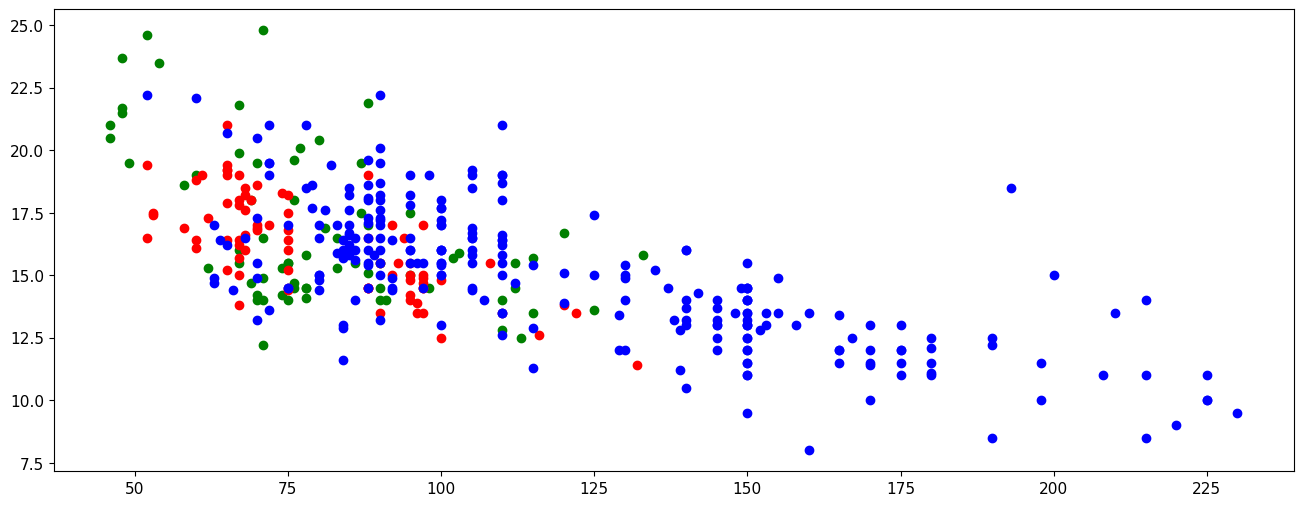

In [152]:
fig, ax = plt.subplots()

ax.scatter(hp_europe, acc_europe, color='green')
ax.scatter(hp_japan, acc_japan, color='red')
ax.scatter(hp_usa, acc_usa, color='blue')
plt.show()

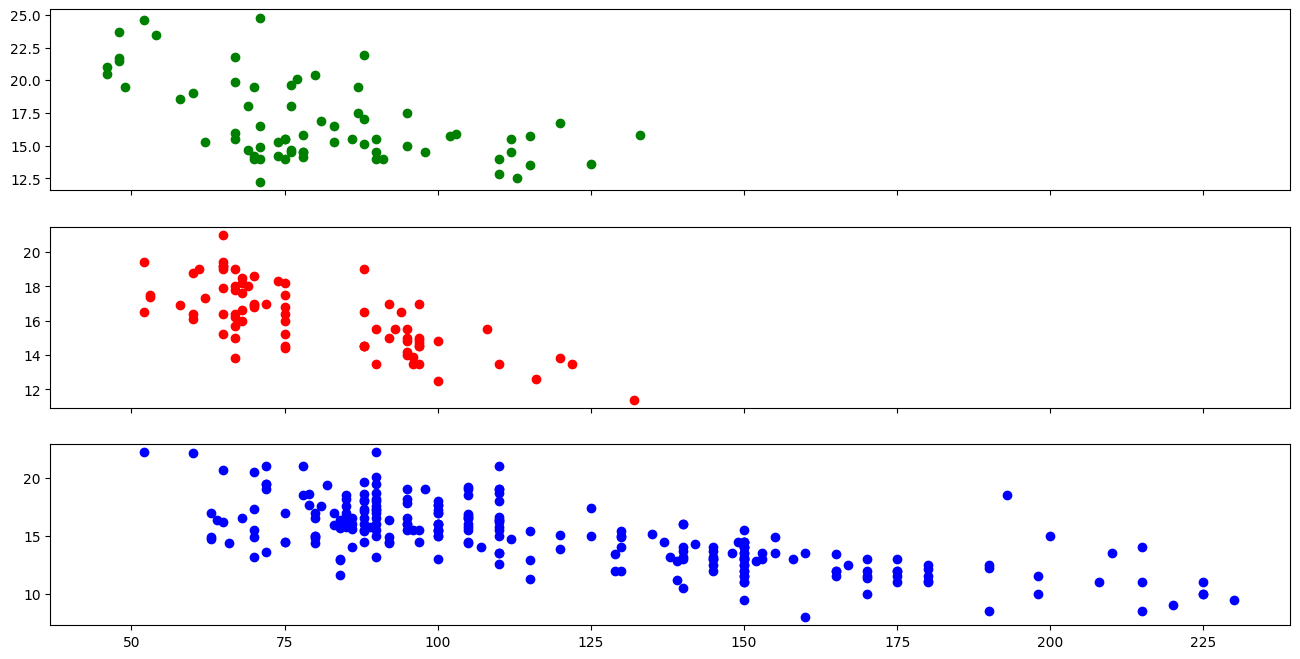

In [25]:
fig, ax = plt.subplots(3,1, figsize=(16,8), sharex=True)

ax[0].scatter(hp_europe, acc_europe, color='green')
ax[1].scatter(hp_japan, acc_japan, color='red')
ax[2].scatter(hp_usa, acc_usa, color='blue')
plt.show()